<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
cars = pd.read_csv('/content/used_cars_data.csv')
cars

,Unnamed: 0,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1
...,...,...,...,...,...,...,...,...,...,...
787,787,Volkswagen,Golf,13990,Edition 1.6 TDI 110CV BMT,2016,84040,Diésel,Manual,Gavá
788,788,Kia,Sportage,24990,1.6 GDi 97kW (132CV) Basic 4x2,2018,65872,Gasolina,Manual,Viladecans
789,789,Abarth,500,17990,1.4 16v T-Jet 595 118kW (160CV) Pista E6,2019,28830,Gasolina,Manual,Mataró
790,790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


In [47]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     792 non-null    int64 
 1   brand          792 non-null    object
 2   model          792 non-null    object
 3   price (eur)    792 non-null    int64 
 4   engine         792 non-null    object
 5   year           792 non-null    int64 
 6   mileage (kms)  792 non-null    int64 
 7   fuel           792 non-null    object
 8   gearbox        792 non-null    object
 9   location       792 non-null    object
dtypes: int64(4), object(6)
memory usage: 62.0+ KB


Dropping unnecessary columns especially:  Unnamed: 0  

In [48]:
cars.drop('Unnamed: 0', axis=1, inplace=True)

In [49]:
cars.head()

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


I want to rename the columns: price (eur)	and mileage (kms)





In [50]:
cars = cars.rename(columns={'price (eur)': 'price_eur','mileage (kms)':'mileage_kms'})

In [51]:
cars.nunique()

brand           36
model          206
price_eur      170
engine         694
year            16
mileage_kms    686
fuel             5
gearbox          2
location        10
dtype: int64

In [52]:
cars.head()

,brand,model,price_eur,engine,year,mileage_kms,fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


In [53]:
cars.isnull().sum()

brand          0
model          0
price_eur      0
engine         0
year           0
mileage_kms    0
fuel           0
gearbox        0
location       0
dtype: int64

In [54]:
#Checking dor duplicate values
duplicates = cars[cars.duplicated()]
duplicates

,brand,model,price_eur,engine,year,mileage_kms,fuel,gearbox,location
790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


In [55]:
cars = cars.drop_duplicates()

In [56]:
cars.duplicated().sum()

0

In [57]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 791
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        791 non-null    object
 1   model        791 non-null    object
 2   price_eur    791 non-null    int64 
 3   engine       791 non-null    object
 4   year         791 non-null    int64 
 5   mileage_kms  791 non-null    int64 
 6   fuel         791 non-null    object
 7   gearbox      791 non-null    object
 8   location     791 non-null    object
dtypes: int64(3), object(6)
memory usage: 61.8+ KB


<ipython-input-64-7cf7702c5499>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price_eur'])


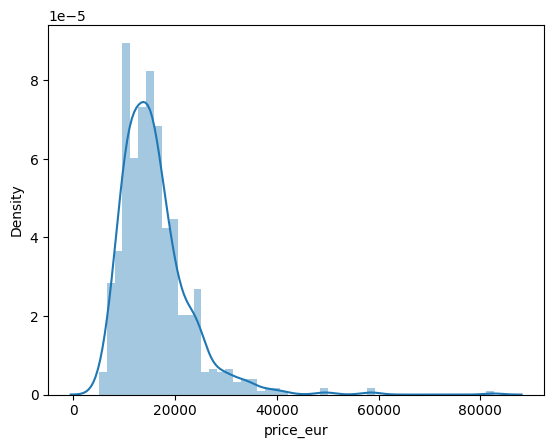

In [64]:
sns.distplot(cars['price_eur'])
plt.show()

Feature_Engineering

In [32]:
67000/2016

33.23412698412698

In [33]:
2024-2016

8

In [36]:
#Calculating the age of the car
cars['car_age'] = 2024 - cars['year']
cars.head()

,brand,model,price_eur,engine,year,mileage_kms,fuel,gearbox,location,car_age
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers,8
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans,10
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans,13
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans,6
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1,8


In [37]:
#Calculating the price per mile
#Since mileage is in kilometers we have to convert it to miles
cars['price_per_mile']=cars['price_eur']/(cars['mileage_kms']*0.621371)
cars.head()

,brand,model,price_eur,engine,year,mileage_kms,fuel,gearbox,location,car_age,price_per_mile
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers,8,0.215940
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans,10,0.153310
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans,13,0.157816
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans,6,0.903866
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1,8,0.241171


Encoding categorical features

The reason for dropping the engine is that the nunique values were 694 and the whole dataset has a sample of 791 meaning that almost all cars have different engines based on differenct cars excpet for maybe the seven

In [38]:
cars.drop('engine', axis=1, inplace=True)

In [41]:
cars.nunique()

brand              36
model             206
price_eur         170
year               16
mileage_kms       686
fuel                5
gearbox             2
location           10
car_age            16
price_per_mile    788
dtype: int64

In [39]:
cars.head()

,brand,model,price_eur,year,mileage_kms,fuel,gearbox,location,car_age,price_per_mile
0,SEAT,Ibiza,8990,2016,67000,Gasolina,Manual,Granollers,8,0.215940
1,Hyundai,i30,9990,2014,104868,Diésel,Manual,Viladecans,10,0.153310
2,BMW,Serie 5,13490,2011,137566,Diésel,Automatica,Viladecans,13,0.157816
3,Volkswagen,Golf,24990,2018,44495,Gasolina,Manual,Viladecans,6,0.903866
4,Opel,Corsa,10460,2016,69800,Gasolina,Manual,Sabadell 1,8,0.241171


In [44]:
cars_encoded =pd.get_dummies(cars, columns = ['brand', 'model', 'fuel', 'gearbox', 'location'], drop_first=True)
cars_encoded = cars_encoded.astype(int)

cars_encoded.head()

,price_eur,year,mileage_kms,car_age,price_per_mile,brand_Alfa,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,...,gearbox_Manual,location_Esplugas,location_Gavá,location_Granollers,location_Hospitalet,location_Mataró,location_Sabadell 1,location_Sabadell 2,location_Sabadell 3,location_Viladecans
0,8990,2016,67000,8,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,9990,2014,104868,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,13490,2011,137566,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,24990,2018,44495,6,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,10460,2016,69800,8,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Feature Scaling

In [66]:
X = cars_encoded.drop('price_eur', axis=1)
y = cars_encoded['price_eur']

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Convert scaled features array back to Dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,year,mileage_kms,car_age,price_per_mile,brand_Alfa,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,brand_Cupra,...,gearbox_Manual,location_Esplugas,location_Gavá,location_Granollers,location_Hospitalet,location_Mataró,location_Sabadell 1,location_Sabadell 2,location_Sabadell 3,location_Viladecans
0,-0.166103,-0.349736,0.166103,-0.209319,-0.071292,-0.242698,-0.278669,-0.035578,-0.236801,-0.050347,...,0.644226,-0.314024,-0.301719,3.184469,-0.330752,-0.318859,-0.429106,-0.294174,-0.330752,-0.358313
1,-0.982177,0.471427,0.982177,-0.209319,-0.071292,-0.242698,-0.278669,-0.035578,-0.236801,-0.050347,...,0.644226,-0.314024,-0.301719,-0.314024,-0.330752,-0.318859,-0.429106,-0.294174,-0.330752,2.790858
2,-2.206288,1.180479,2.206288,-0.209319,-0.071292,-0.242698,3.588481,-0.035578,-0.236801,-0.050347,...,-1.552251,-0.314024,-0.301719,-0.314024,-0.330752,-0.318859,-0.429106,-0.294174,-0.330752,2.790858
3,0.649970,-0.837754,-0.649970,-0.209319,-0.071292,-0.242698,-0.278669,-0.035578,-0.236801,-0.050347,...,0.644226,-0.314024,-0.301719,-0.314024,-0.330752,-0.318859,-0.429106,-0.294174,-0.330752,2.790858
4,-0.166103,-0.289019,0.166103,-0.209319,-0.071292,-0.242698,-0.278669,-0.035578,-0.236801,-0.050347,...,0.644226,-0.314024,-0.301719,-0.314024,-0.330752,-0.318859,2.330428,-0.294174,-0.330752,-0.358313


In [69]:
cars_encoded

,price_eur,year,mileage_kms,car_age,price_per_mile,brand_Alfa,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,...,gearbox_Manual,location_Esplugas,location_Gavá,location_Granollers,location_Hospitalet,location_Mataró,location_Sabadell 1,location_Sabadell 2,location_Sabadell 3,location_Viladecans
0,8990,2016,67000,8,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,9990,2014,104868,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,13490,2011,137566,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,24990,2018,44495,6,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,10460,2016,69800,8,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,15990,2018,21404,6,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
787,13990,2016,84040,8,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
788,24990,2018,65872,6,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
789,17990,2019,28830,5,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


**Dimensionality Reduction**

Correlation Analysis

In [73]:
sns.heatmap(cars_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

KeyboardInterrupt: 

Principal Component Analysis

In [74]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print('Original shape', X.shape)
print('Transformed shape', X_pca.shape)

Original shape (791, 258)
Transformed shape (791, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

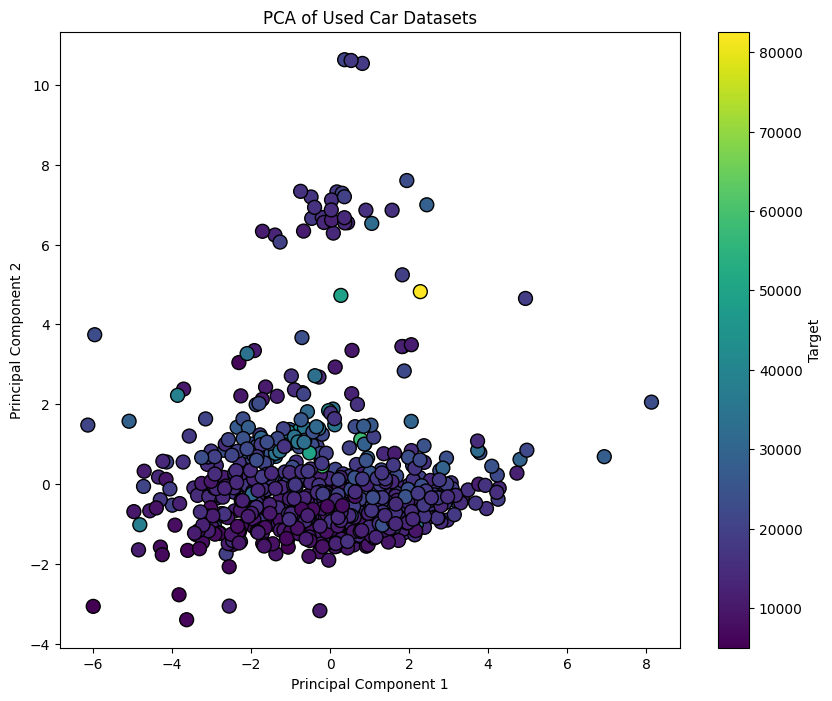

In [88]:
# Plotting PCA results
plt.figure(figsize = (10,8))
#ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Used Car Datasets')
plt.colorbar(label='Target')
plt.show

MODELLING AND EVALUATION

In [93]:
y.mean()

15974.627054361568

Linear Regression

In [95]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lin_reg = linear_model.LinearRegression()
scores = cross_val_score(lin_reg, X_pca, y, cv=10, scoring='neg_mean_squared_error').mean() * -1
r2_scores = cross_val_score(lin_reg, X_pca, y, cv=10, scoring='r2')
print(r2_scores.mean())
print(scores.mean())


0.36773581455067106
30332050.596238397


In [99]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor,  RandomForestRegressor,  StackingRegressor
from sklearn.tree import DecisionTreeRegressor

In [102]:

ridge = make_pipeline(PolynomialFeatures(degree=3), Ridge(alpha = 0.5, solver='auto'))
scores = cross_val_score(ridge, X_pca, y, cv=10, scoring='neg_mean_squared_error').mean() * -1
r2_scores = cross_val_score(ridge, X_pca, y, cv=10, scoring='r2')
print(r2_scores.mean())
print(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.34968e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.20282e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.32384e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.72785e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

0.4168603660492338
24597301.650716424


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.65082e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.92214e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.77948e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.54943e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [103]:
g_reg = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, min_samples_split = 2, learning_rate= 0.01, random_state=0)
scores = cross_val_score(g_reg, X_pca, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
r2_scores = cross_val_score(g_reg, X_pca, y, cv=10, scoring='r2')
print(r2_scores.mean())
print(scores)

0.25838172145432187
3975.9927034587154


In [104]:
b_reg = BaggingRegressor(random_state=0, n_estimators=100, max_samples = 1.0)
scores = cross_val_score(b_reg, X_pca, y, cv=5, scoring='neg_mean_absolute_error').mean()*-1
r2_scores = cross_val_score(b_reg, X_pca, y, cv=5, scoring='r2')
print(r2_scores.mean())
print(scores)

0.39707017691504426
3554.057003423294


In [105]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
#Defining the hyperparameter space for bagging regressor
space = {
    'n_estimators':hp.quniform('n_estimators', 100, 300, 1),
    'max_samples': hp.uniform('max_samples', 0.1, 1.0),
    'max_features': hp.uniform('max_features', 0.5, 1.0)

    }

#Defining the objective function
def objective(params):
  #Extract and convert hyperparameters
  n_estimators = int(params['n_estimators'])
  max_samples = params['max_samples']
  max_features = params['max_features']

  #Initialize the base estimator
  b_reg_model = BaggingRegressor(
      n_estimators = n_estimators,
      max_samples = max_samples,
      max_features = max_features,
      random_state = 42
  )

  #Perform cross-validation and calculate the mean score
  cv_scores = cross_val_score(b_reg_model, X_pca, y, cv=10, scoring='neg_mean_absolute_error')
  mean_score = -cv_scores.mean()

  #Return the loss and status
  return {'loss':mean_score, 'status': STATUS_OK}


#Setting up trials for object
trials = Trials()

#Run the hyperparameter optimization
best = fmin(
    fn = objective,
    space = space,
    algo = tpe.suggest,
    max_evals = 100,
    trials = trials
)
#Print the best hyperparameters

 61%|██████    | 61/100 [07:24<04:44,  7.29s/trial, best loss: 3476.2506382620923]